<a href="https://colab.research.google.com/github/DmitryKutsev/DeepHW/blob/master/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from math import e
from sklearn.metrics import classification_report
from sympy import diff
import torch
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms

import matplotlib.pyplot as plt

from tqdm import tqdm

from sklearn.metrics import accuracy_score

import time

In [ ]:

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [ ]:

train_dataset = MNIST('.', train=True, download=True, transform=transform)
test_dataset = MNIST('.', train=False, transform=transform)

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw




Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
train_dataset.data = train_dataset.data[(train_dataset.targets == 3) | (train_dataset.targets == 7)]
train_dataset.targets = train_dataset.targets[(train_dataset.targets == 3) | (train_dataset.targets == 7)]

test_dataset.data = test_dataset.data[(test_dataset.targets == 3) | (test_dataset.targets == 7)]
test_dataset.targets = test_dataset.targets[(test_dataset.targets == 3) | (test_dataset.targets == 7)]

train_dataset.targets = (train_dataset.targets == 7).long()
test_dataset.targets = (test_dataset.targets == 7).long()
#what is .long()?

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

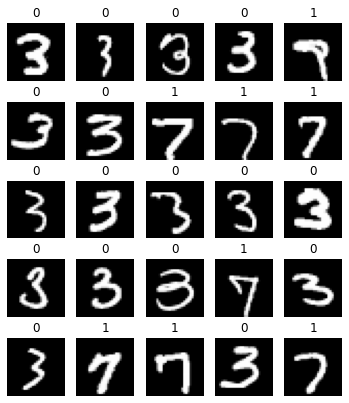

In [ ]:
X, y = next(iter(train_loader))
X = X.numpy()
y = y.numpy()

plt.figure(figsize=(6, 7))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X[i].reshape(28, 28), cmap=plt.cm.Greys_r)
    plt.title(y[i])
    plt.axis('off')

In [ ]:
for x, y in train_loader:
    break

In [ ]:
x.shape

torch.Size([128, 1, 28, 28])

In [ ]:
x.view(x.shape[0], -1).numpy().shape

(128, 784)

In [ ]:

for x, y in train_loader:
    x = x.view(x.shape[0], -1).numpy()
    y = y.numpy()
    break

In [ ]:

# количество эпох - полных проходов по датасету
epochs = 3

for n_epoch in range(epochs):
    
    dataset_passed_samples = 0
    
    for x, y in train_loader:
        
        # вот здесь мы могли бы как-то манипулировать с данными
        # например, учить, но пока этого делать не будет
        # только демонстрация
        
        time.sleep(0.05)
        
        dataset_passed_samples += x.shape[0]
        
        dataset_passed_percent = dataset_passed_samples * 100 / train_loader.dataset.data.shape[0]
        
        print(f'Эпоха - {n_epoch + 1}, прошли - {dataset_passed_percent:.2f} % датасета', end='\r')
        
    print('\r')

Эпоха - 1, прошли - 100.00 % датасета
Эпоха - 2, прошли - 100.00 % датасета
Эпоха - 3, прошли - 100.00 % датасета


In [ ]:
# таким образом мы создаем матрицу 64 на 512 с рандомными значениями
x = np.random.rand(64, 512)
x

array([[0.92302333, 0.26226872, 0.27538772, ..., 0.95672761, 0.80328783,
        0.32270609],
       [0.73205459, 0.46969532, 0.11178543, ..., 0.77477339, 0.16967218,
        0.23342313],
       [0.5651854 , 0.59134453, 0.23766434, ..., 0.08426304, 0.52801576,
        0.80039298],
       ...,
       [0.79422652, 0.45345649, 0.3779472 , ..., 0.34642899, 0.13782365,
        0.03570558],
       [0.89917929, 0.18254922, 0.3652911 , ..., 0.17430483, 0.41390322,
        0.29071141],
       [0.22084054, 0.85685845, 0.15292   , ..., 0.9553653 , 0.63699711,
        0.42727546]])

In [ ]:
# большинство функций применяются к каждому элементу массива
# здесь мы каждый элемент массива возвели в квадрат и прибавили к получившемуся значению логарифм элемента матрицы 
x ** 2 + np.log(x)

array([[ 0.77187129, -1.26960077, -1.21373687, ...,  0.87109116,
         0.42622914, -1.0268741 ],
       [ 0.22400372, -0.53505734, -2.17867804, ...,  0.34508911,
        -1.74509843, -1.40041609],
       [-0.25116694, -0.17566812, -1.38041161, ..., -2.46671167,
        -0.3598285 ,  0.41797648],
       ...,
       [ 0.40040919, -0.58523317, -0.83015669, ..., -0.94006436,
        -1.96278495, -3.33117329],
       [ 0.70225055, -1.6674112 , -0.87362313, ..., -1.71656746,
        -0.71080722, -1.15091111],
       [-1.46154382,  0.57972386, -1.85445581, ...,  0.86706135,
        -0.04522484, -0.66776205]])

In [ ]:
y = np.random.rand(512, 1024)
# скалярное произведение
res = np.dot(x, y)

In [ ]:
res.shape == (x.shape[0], y.shape[1])

True

In [ ]:
x.shape

(64, 512)

In [ ]:
res.shape

(64, 1024)

In [ ]:
# x = np.random.rand(64, 512)
# y = np.random.rand(512, 1024)

In [ ]:

# res.shape == (x.shape[0], y.shape[1])

In [ ]:
# x = np.random.rand(64, 512)
# y = np.random.rand(512, 1024)


# for x, y in train_loader:
#     x = x.view(x.shape[0], -1).numpy()
#     y = y.numpy()
#     break


In [45]:
# y = np.random.rand(512, 1024)
# x = np.random.rand(64, 512)

learning_rate = 0.01
epochs = 3

w1 = np.random.rand(784, 1)
b1 = np.zeros((128, 1))
w2 = np.random.rand(1, 128)
b2 = np.zeros((128, 1))

loss_func = 0

losses = []

for n_epoch in range(epochs):
    
    print(f'Epoch: {n_epoch + 1}')
    
    for x, y in train_loader:
        
        x = x.view(x.shape[0], -1).numpy()
        y = np.expand_dims(y.numpy(), 1)
        #print(x.shape)
        if x.shape[0] == 108:
          print(x.shape)
          continue


        func1 = np.dot(x,w1) + b1
        func1 = np.tanh(func1)
        #print(func1.shape, 'func1')
        func2 = np.dot(func1,w2 )+ b2
        func2 = np.tanh(func2)
                
        # forward
        
        # рассчет bce
        # не забудьте добавить это значение в массив losses

        my_y = 1/(1 + np.exp(-func2))
        loss = -np.mean(y*np.log(my_y) + (1-y)*np.log(1-my_y))
        losses.append(loss)
          
        # backward
        #diff(np.tanh(func2))
        
        # gradient descent

Epoch: 1
(108, 784)
Epoch: 2
(108, 784)
Epoch: 3
(108, 784)


In [ ]:
# losses

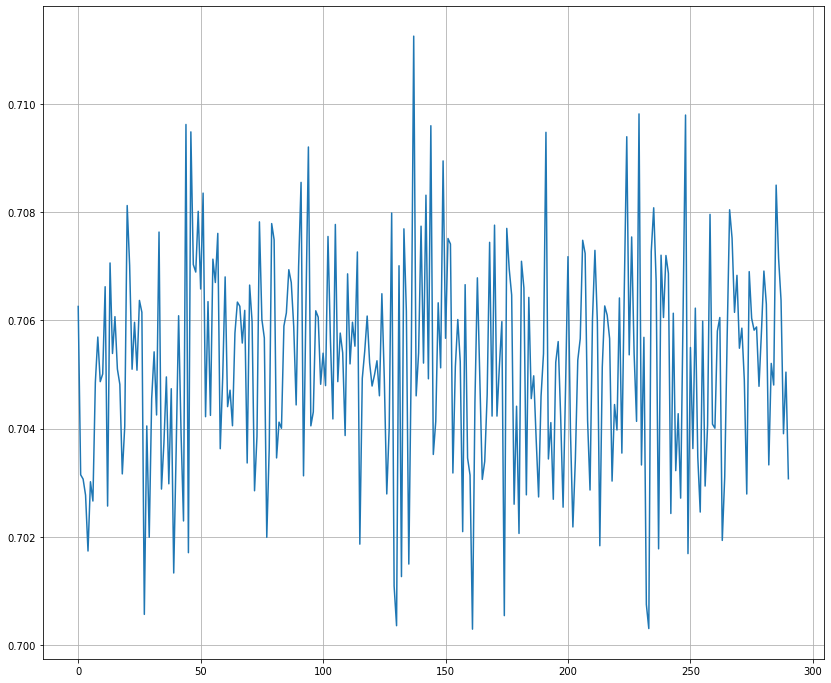

In [ ]:

plt.figure(figsize=(14, 12))
plt.plot(losses)
plt.grid()